# Ajout des nombres d'epoches 

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pathlib
import glob
import os

from tensorflow.keras.layers import Dense , Flatten , Dropout , Conv2D , MaxPooling2D
from tensorflow.keras.models import Model , Sequential
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
path = './input/labels.csv'
df = pd.read_csv(path)

In [2]:
# Load the model from traffic_signs.keras file
model = tf.keras.models.load_model('traffic_signs.keras')

In [3]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 128)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                 

In [13]:
dataset = './input/traffic_Data/DATA'
train_ds = tf.keras.preprocessing.image_dataset_from_directory(dataset,validation_split=0.2,
                                                    subset='training',
                                                    image_size=(224,224),
                                                    seed=123,
                                                    batch_size=32)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(dataset,validation_split=0.2,
                                                    subset='validation',
                                                    image_size=(224,224),
                                                    seed=123,
                                                    batch_size=32)

Found 4170 files belonging to 58 classes.
Using 3336 files for training.
Found 4170 files belonging to 58 classes.
Using 834 files for validation.


In [14]:
# add 10 epochs to the existing model
mycallbacks = [EarlyStopping(monitor='val_loss', patience=5)]
model.fit(train_ds, validation_data=val_ds, epochs=10, callbacks=[mycallbacks])

Epoch 1/10


105/105 [==============================] - 310s 3s/step - loss: 0.7258 - accuracy: 0.7485 - val_loss: 0.5339 - val_accuracy: 0.8249
Epoch 2/10
105/105 [==============================] - 223s 2s/step - loss: 0.6549 - accuracy: 0.7788 - val_loss: 0.4312 - val_accuracy: 0.8657
Epoch 3/10
105/105 [==============================] - 602s 6s/step - loss: 0.5919 - accuracy: 0.7911 - val_loss: 0.4444 - val_accuracy: 0.8525
Epoch 4/10
105/105 [==============================] - 272s 3s/step - loss: 0.5507 - accuracy: 0.8070 - val_loss: 0.3869 - val_accuracy: 0.8753
Epoch 5/10
105/105 [==============================] - 244s 2s/step - loss: 0.5517 - accuracy: 0.8085 - val_loss: 0.3851 - val_accuracy: 0.8897
Epoch 6/10
105/105 [==============================] - 240s 2s/step - loss: 0.4961 - accuracy: 0.8264 - val_loss: 0.5480 - val_accuracy: 0.8309
Epoch 7/10
105/105 [==============================] - 263s 3s/step - loss: 0.4956 - accuracy: 0.8345 - val_loss: 0.4193 - val_accuracy: 0.86

In [15]:
model.save('traffic_signs_v2.keras')

In [17]:
model2 = tf.keras.models.load_model('traffic_signs_v2.keras')

In [18]:
model2.fit(train_ds, validation_data=val_ds, epochs=10, callbacks=[mycallbacks])

Epoch 1/10
105/105 [==============================] - 244s 2s/step - loss: 0.3992 - accuracy: 0.8699 - val_loss: 0.2896 - val_accuracy: 0.9077
Epoch 2/10
105/105 [==============================] - 264s 3s/step - loss: 0.3690 - accuracy: 0.8762 - val_loss: 0.2326 - val_accuracy: 0.9388
Epoch 3/10
105/105 [==============================] - 249s 2s/step - loss: 0.3673 - accuracy: 0.8735 - val_loss: 0.2604 - val_accuracy: 0.9209
Epoch 4/10
105/105 [==============================] - 272s 3s/step - loss: 0.3339 - accuracy: 0.8933 - val_loss: 0.2706 - val_accuracy: 0.9257
Epoch 5/10
105/105 [==============================] - 262s 2s/step - loss: 0.3241 - accuracy: 0.8891 - val_loss: 0.2934 - val_accuracy: 0.9113
Epoch 6/10
105/105 [==============================] - 268s 3s/step - loss: 0.3111 - accuracy: 0.8996 - val_loss: 0.2420 - val_accuracy: 0.9209
Epoch 7/10
105/105 [==============================] - 255s 2s/step - loss: 0.3130 - accuracy: 0.8972 - val_loss: 0.2101 - val_accuracy: 0.9365

1/1 [==============================] - 0s 486ms/step


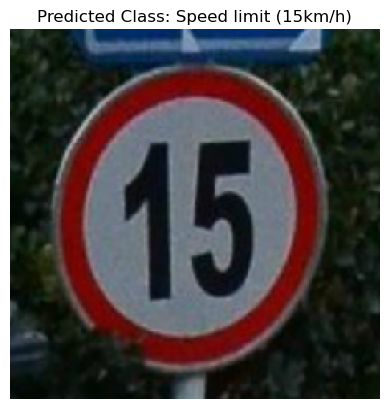

1/1 [==============================] - 0s 121ms/step


In [24]:
def test_external_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch

    # Predict class probabilities
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])

    # Map predicted class number to class name
    predicted_class_name = df['Name'][predicted_class]

    # Convert EagerTensor to NumPy array and then use astype
    plt.imshow(np.array(img_array[0]).astype("uint8"))
    plt.title(f"Predicted Class: {predicted_class_name}")
    plt.axis("off")
    plt.show()

# Assuming model and df are defined before calling the function
test_external_image("input/traffic_Data/TEST/001_0004_j.png")
test_external_image("input/traffic_Data/TEST/000_1_0004_1_j.png")